In [1]:
# General imports
import matplotlib.pyplot as plt
import numpy as np

# Imports from our library!
from indecision import particle, simulation

In [2]:
# Example particle
p = particle.MonoLigandParticle(
    receptor_density=0.009,
    binding_strength=1,
    on_rate=1, off_rate=1
)

In [3]:
# Define a quick extractor (TODO: This should be provided by the library)
def extractor(states: list) -> float:
    N = len(states)
    attached = len(list(filter(lambda state: state.is_attached > 0, states)))

    return attached / N

N = 1000

def theta(receptor_density: float) -> float:
    p = particle.MonoLigandParticle(
        receptor_density=receptor_density,
        binding_strength=1,
        on_rate=10, off_rate=1
    )
    
    bind_ratios = [b for b in simulation.simulate_until(
        particle=p,
        number_of_particles=N,
        extractor=extractor,
        steps=100
    )]

    return bind_ratios[-1]

In [6]:
import time

start = time.time()

# Calculate the thetas for different receptor densities
receptor_densities = np.linspace(0.5, 1, num=100)
thetas = [theta(rd) for rd in receptor_densities]

end = time.time()
print(f"Took {end - start}")

Took 78.26936411857605


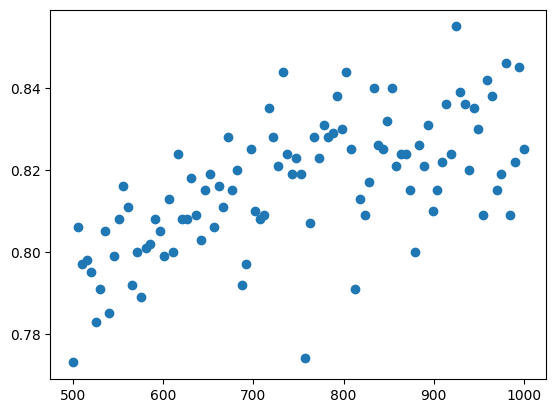

In [5]:
# Plot it. We get a linear curve, which is what we expect for mono-ligand particles. 
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(receptor_densities * N, thetas)

# receptor_densities = np.logspace(-5, -1, base=10, num=5)

# receptor_densities